<a href="https://colab.research.google.com/github/ce3tnia/SubmissionDicoding/blob/main/DicodingSubmission_Cecilia_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Download Dataset from Kaggle**

In [ ]:
#install kaggle package
!pip install -q kaggle

In [ ]:
#kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ce3tnia","key":"03dd7be24c9fa220b11462fb1bd9c224"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d alessiocorrado99/animals10

 98% 573M/586M [00:02<00:00, 193MB/s]
100% 586M/586M [00:03<00:00, 203MB/s]


In [ ]:
!mkdir animals
!unzip -qq animals10.zip -d animals
!ls animals

raw-img  translate.py


In [ ]:
!ls animals/raw-img/

cane	 elefante  gallina  mucca   ragno
cavallo  farfalla  gatto    pecora  scoiattolo


# **Import Library**

In [ ]:
import os
import shutil
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# **Load Data**

In [ ]:
animals = os.path.join('/content/animals/raw-img/')

print(os.listdir(animals))

['cane', 'elefante', 'scoiattolo', 'gatto', 'gallina', 'cavallo', 'mucca', 'ragno', 'farfalla', 'pecora']


In [ ]:
ignore_animals = ['scoiattolo', 'gatto', 'gallina', 'ragno', 'farfalla', 'pecora']

for x in ignore_animals:
  path = os.path.join(animals, x)
  shutil.rmtree(path)

In [ ]:
list_animals = os.listdir(animals)
print(list_animals)

['cane', 'elefante', 'cavallo', 'mucca']


In [ ]:
from PIL import Image
total = 0

for x in list_animals:
  dir = os.path.join(animals, x)
  y = len(os.listdir(dir))
  print(x+':', y)
  total = total + y
  
  img_name = os.listdir(dir)
  for z in range(4):
    img_path = os.path.join(dir, img_name[z])
    img = Image.open(img_path)
    print('-',img.size)
  print('---------------')

print('\nTotal :', total)

cane: 4863
- (201, 300)
- (225, 300)
- (300, 200)
- (200, 300)
---------------
elefante: 1446
- (300, 200)
- (640, 426)
- (300, 188)
- (640, 360)
---------------
cavallo: 2623
- (300, 121)
- (300, 225)
- (225, 300)
- (300, 225)
---------------
mucca: 1866
- (300, 225)
- (234, 300)
- (300, 195)
- (300, 200)
---------------

Total : 10798


<function matplotlib.pyplot.show>

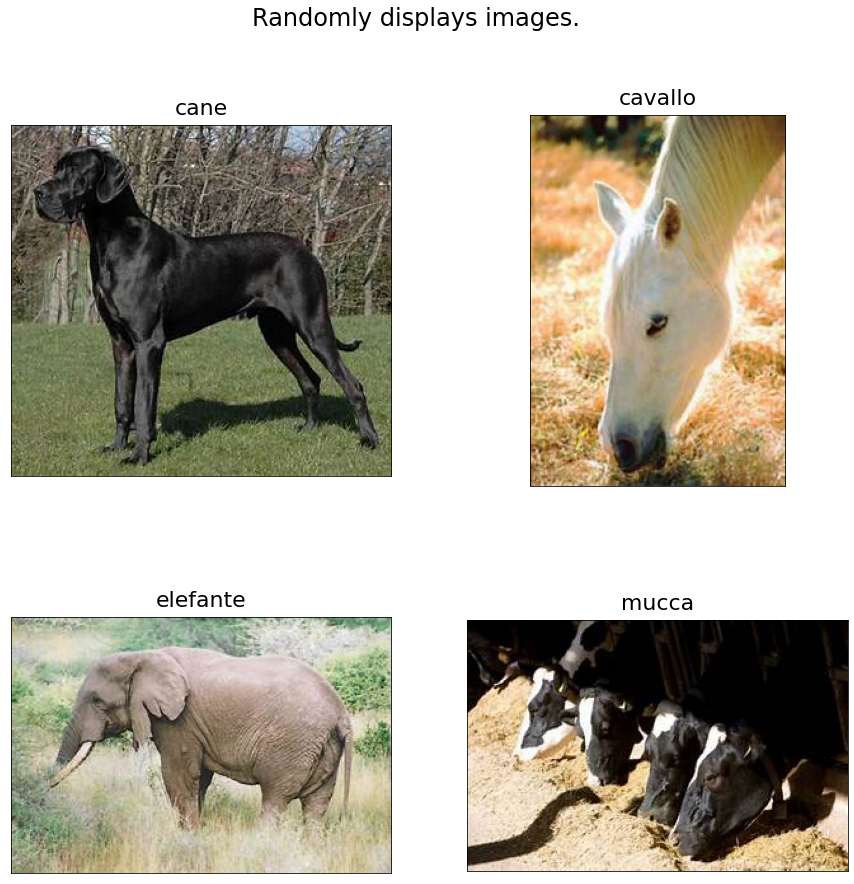

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle("Randomly displays images.", fontsize=24)
animals_sorted = sorted(list_animals)
animals_id = 0
for i in range(2):
  for j in range(2):
    try:
      animals_selected = animals_sorted[animals_id] 
      animals_id += 1
    except:
      break
    if animals_selected == '.TEMP':
        continue
    animals_selected_images = os.listdir(os.path.join(animals, animals_selected))
    animals_selected_random = np.random.choice(animals_selected_images)
    img = plt.imread(os.path.join(animals, animals_selected, animals_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(animals_selected, pad=10, fontsize=22)
    
plt.setp(ax, xticks=[],yticks=[])
plt.show

# **Model and Training**

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2   
)

In [ ]:
batch_size = 256

data_train = train_datagen.flow_from_directory(
    animals,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

data_val = train_datagen.flow_from_directory(
    animals, 
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 8640 images belonging to 4 classes.
Found 2158 images belonging to 4 classes.


In [ ]:
tf.device('/device:GPU:0')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85 and logs.get('val_accuracy')>0.85):
      print("\nAkurasi telah mencapai 85%")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(data_train, 
                    epochs = 150, 
                    steps_per_epoch = data_train.samples // batch_size,
                    validation_data = data_val, 
                    validation_steps = data_val.samples // batch_size,
                    verbose = 1,
                    callbacks = [callbacks])

Epoch 1/150
33/33 [==============================] - 99s 2s/step - loss: 1.3098 - accuracy: 0.4306 - val_loss: 1.2523 - val_accuracy: 0.4526
Epoch 2/150
33/33 [==============================] - 62s 2s/step - loss: 1.2112 - accuracy: 0.4733 - val_loss: 1.1327 - val_accuracy: 0.5103
Epoch 3/150
33/33 [==============================] - 62s 2s/step - loss: 1.1296 - accuracy: 0.5153 - val_loss: 1.0729 - val_accuracy: 0.5405
Epoch 4/150
33/33 [==============================] - 63s 2s/step - loss: 1.0650 - accuracy: 0.5441 - val_loss: 1.0586 - val_accuracy: 0.5532
Epoch 5/150
33/33 [==============================] - 63s 2s/step - loss: 1.0369 - accuracy: 0.5661 - val_loss: 0.9751 - val_accuracy: 0.5879
Epoch 6/150
33/33 [==============================] - 62s 2s/step - loss: 1.0079 - accuracy: 0.5856 - val_loss: 0.9749 - val_accuracy: 0.5942
Epoch 7/150
33/33 [==============================] - 62s 2s/step - loss: 0.9721 - accuracy: 0.6029 - val_loss: 0.9196 - val_accuracy: 0.6172
Epoch 8/150
3

# **Plotting**

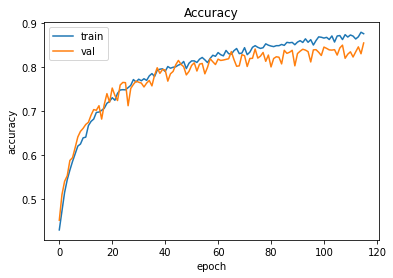

In [ ]:
#plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

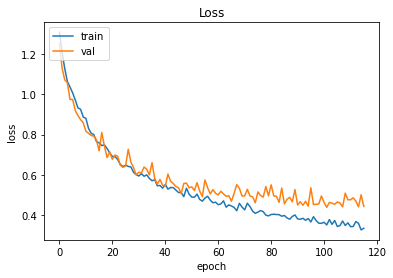

In [ ]:
#plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# **TF-Lite**

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp475jula6/assets


In [ ]:
!ls -la | grep 'model'

-rw-r--r-- 1 root root  13900684 Aug 16 04:21 model.tflite
